In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import gensim
import nltk

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.stem import PorterStemmer
from collections import Counter
from nltk.corpus import stopwords
csv.field_size_limit(10 * 1024 * 1024)  # Set the field size limit to 10 MB

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nikki\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Nikki\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nikki\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


131072

Checking if elements has any empty or missing values

In [2]:
data = pd.read_csv('medium_articles_predicted.csv')
# Check if any values in the DataFrame are missing or empty
print(data.isna().any().any())
print(data.isnull().any().any())

False
False


Creating histogram of lenght distribution

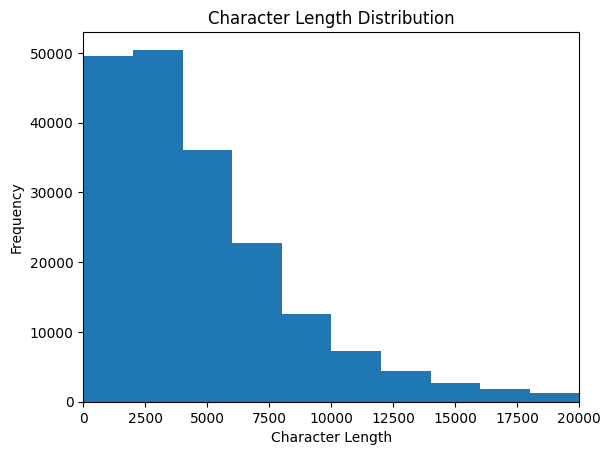

In [3]:
# Create a histogram of character lengths
char_lengths = data['text'].str.len()
plt.hist(char_lengths, bins=50)
plt.xlabel('Character Length')
plt.ylabel('Frequency')
plt.title('Character Length Distribution')

# Set custom x-axis range
plt.xlim(0, 20000)

plt.show()

Creating histogram of text distribution by categories

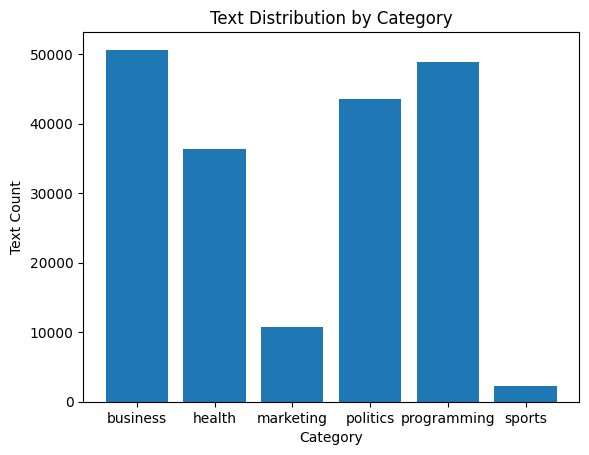

In [4]:
# Compute total text count for each category
category_counts = data.groupby('category')['text'].count()

# Create a bar chart of category counts
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Category')
plt.ylabel('Text Count')
plt.title('Text Distribution by Category')

plt.show()

Load the CSV dataset into a list of dictionaries, where each dictionary represents a row in the CSV file:

In [5]:
data = []
with open('medium_articles_predicted.csv',encoding="utf8") as csv_file:
    csv_reader = csv.DictReader(csv_file)
    for row in csv_reader:
        data.append(row)

Loop through each row in the data list, convert the text column to lowercase, tokenize the text and save the changes

In [6]:
for row in data:
    row['text'] = row['text'].lower()
    text = row['text']
    tokens = gensim.utils.simple_preprocess(text)
    row['tokenized_text'] = tokens

with open('medium_articles_predicted_tokenized.csv', 'w', newline='', encoding="utf8") as csv_file:
    fieldnames = data[0].keys()
    csv_writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    csv_writer.writeheader()
    for row in data:
        csv_writer.writerow(row)

Create and plot a list to store the number of words in each row's tokenized_text column

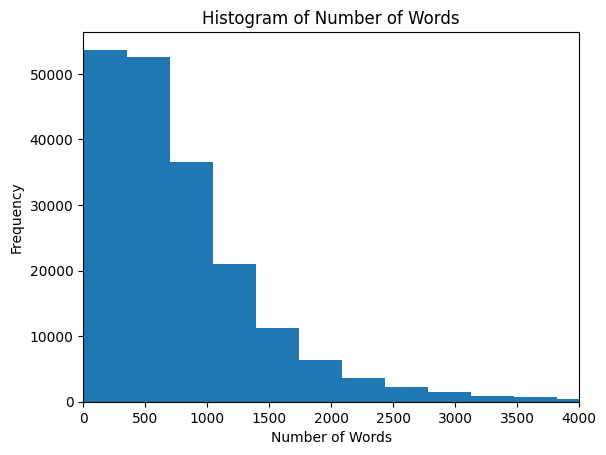

In [7]:
num_words = []
for row in data:
    num_words.append(len(row['tokenized_text']))

plt.hist(num_words, bins=50)
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Words')
# Set custom x-axis range
plt.xlim(0, 4000)
plt.show()

Load the tokenized text data into a list

In [8]:
df = pd.read_csv("medium_articles_predicted_tokenized.csv")
df[1:3]

,category,text,tokenized_text
1,health,your brain on coronavirus\n\na guide to the cu...,"['your', 'brain', 'on', 'coronavirus', 'guide'..."
2,health,mind your nose\n\nhow smell training can chang...,"['mind', 'your', 'nose', 'how', 'smell', 'trai..."


In [9]:
tokenized_text = []
with open('medium_articles_predicted_tokenized.csv',encoding="utf8") as csv_file:
    csv_reader = csv.DictReader(csv_file)
    for row in csv_reader:
        tokens = row['tokenized_text']
        tokenized_text.extend(tokens)

Count the frequency of each word in the tokenized text using the Counter() function

In [10]:
word_freq = Counter(tokenized_text)

Get and plot the 25 most common words

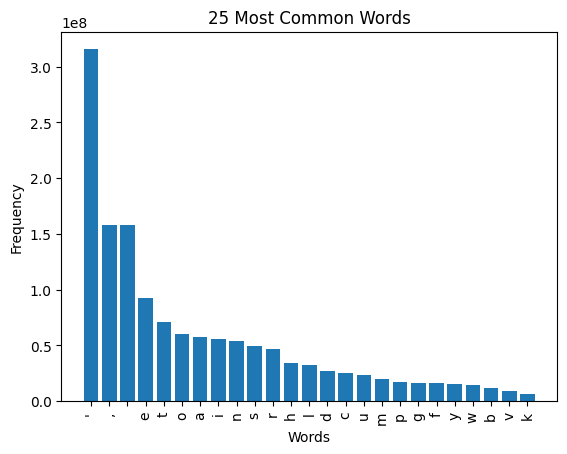

In [11]:
most_common = word_freq.most_common(25)
labels, values = zip(*most_common)
plt.bar(labels, values)
plt.xticks(rotation=90)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('25 Most Common Words')
plt.show()


Now we want to remove meaningless words like commas, single characters, etc. from our tokenized text, we can use NLTK's built-in stopwords list and a list comprehension to filter out the unwanted tokens

In [12]:
stop_words = set(stopwords.words('english'))

for row in data:
    text = row['text']
    tokens = gensim.utils.simple_preprocess(text)
    filtered_tokens = [token for token in tokens if token not in stop_words and len(token) > 1]
    row['tokenized_text'] = filtered_tokens

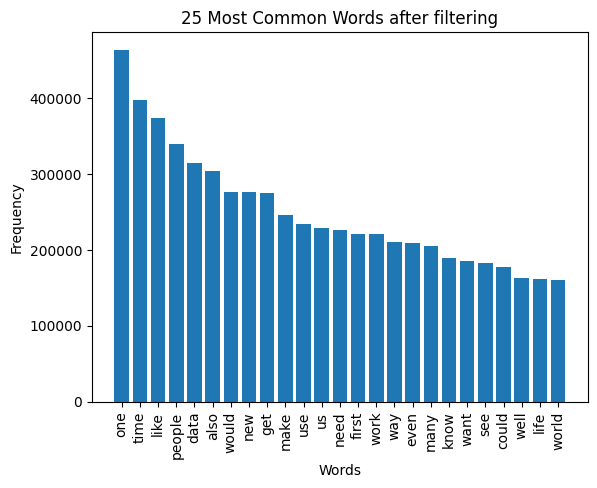

In [13]:
tokenized_text = []
for row in data:
    tokens = row['tokenized_text']
    tokenized_text.extend(tokens)
word_freq = Counter(tokenized_text)
most_common = word_freq.most_common(25)
labels, values = zip(*most_common)
plt.bar(labels, values)
plt.xticks(rotation=90)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('25 Most Common Words after filtering')
plt.show()

In [14]:
with open('medium_articles_predicted_tokenized.csv', 'w', newline='', encoding="utf8") as csv_file:
    fieldnames = data[0].keys()
    csv_writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    csv_writer.writeheader()
    for row in data:
        csv_writer.writerow(row)

In [22]:
df = pd.read_csv("medium_articles_predicted_tokenized.csv")
df[1:7]

,category,text,tokenized_text
1,health,your brain on coronavirus\n\na guide to the cu...,"['brain', 'coronavirus', 'guide', 'curious', '..."
2,health,mind your nose\n\nhow smell training can chang...,"['mind', 'nose', 'smell', 'training', 'change'..."
3,health,passionate about the synergy between science a...,"['passionate', 'synergy', 'science', 'technolo..."
4,health,"you’ve heard of him, haven’t you? phineas gage...","['heard', 'phineas', 'gage', 'railroad', 'work..."
5,health,"mentally, young adults are suffering most from...","['mentally', 'young', 'adults', 'suffering', '..."
6,business,how to turn your popular blog series into a be...,"['turn', 'popular', 'blog', 'series', 'bestsel..."


Now we want to apply porter/stemmer tool in order to translate words to its root form

In [9]:
import csv
from nltk.stem import PorterStemmer

# Create a stemmer object
stemmer = PorterStemmer()

# Open the CSV file and read the data
with open('medium_articles_predicted_tokenized.csv', 'r', encoding='utf-8') as csv_file:
    reader = csv.DictReader(csv_file)
    rows = []
    for row in reader:
        # Stem the text in the tokenized_text column
        tokenized_text = eval(row['tokenized_text'])  # Convert string representation to list object
        stemmed_tokens = [stemmer.stem(token) for token in tokenized_text]

        # Add the updated text to the row dictionary
        row['stemmed_text'] = str(stemmed_tokens)  # Convert list object to string representation

        # Add the updated row to the list of rows
        rows.append(row)

# Write the updated data to a new CSV file
with open('medium_ML.csv', 'w', encoding='utf-8', newline='') as csv_file:
    fieldnames = reader.fieldnames + ['stemmed_text']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(rows)


In [6]:
df=pd.read_csv("medium_ML.csv")
df[2:3]['stemmed_text'].iloc[0]

"['mind', 'nose', 'smell', 'train', 'chang', 'brain', 'six', 'week', 'matter', 'ann', 'sophi', 'barwich', 'come', 'train', 'brain', 'sens', 'smell', 'possibl', 'last', 'thing', 'think', 'could', 'strengthen', 'neural', 'pathway', 'learn', 'new', 'languag', 'read', 'book', 'fewer', 'social', 'media', 'post', 'sure', 'nose', 'olfactori', 'system', 'one', 'plastic', 'system', 'brain', 'neuroplast', 'describ', 'brain', 'flexibl', 'adapt', 'chang', 'environ', 'expos', 'neural', 'damag', 'stimul', 'brain', 'strengthen', 'exist', 'neural', 'structur', 'add', 'fuel', 'brain', 'capac', 'remain', 'adapt', 'therebi', 'keep', 'young', 'smell', 'system', 'particularli', 'adept', 'repair', 'renew', 'olfactori', 'cell', 'recent', 'use', 'human', 'transplant', 'therapi', 'treat', 'spinal', 'cord', 'injuri', 'exampl', 'one', 'reason', 'olfactori', 'system', 'adapt', 'respons', 'undergo', 'adult', 'neurogenesi', 'human', 'grow', 'new', 'olfactori', 'neuron', 'everi', 'three', 'four', 'week', 'throughout

In [7]:
# Remove column
columns_to_remove = ['text', 'tokenized_text']
df = df.drop(columns_to_remove, axis=1)
# Save modified DataFrame to new CSV file
df.to_csv('medium_ML_final.csv', index=False)

In [5]:
df=pd.read_csv("medium_ML_final.csv")
df[2:3].iloc[0]

category                                                   health
stemmed_text    ['mind', 'nose', 'smell', 'train', 'chang', 'b...
Name: 2, dtype: object

In [2]:
# Load the CSV dataset using pandas
df = pd.read_csv('medium_ML_final.csv')

# Define the number of samples for each category
n_samples = 5000
n_samples_sports = 2284

# Group the data by category
groups = df.groupby('category')

# Create a list to hold the sampled data
samples = []

# Sample n_samples elements from each group, except for the 'sports' group which will have n_samples_sports elements
for name, group in groups:
    if name == 'sports':
        sample = group.sample(n_samples_sports, replace=False, random_state=42)
    else:
        sample = group.sample(n_samples, replace=False, random_state=42)
    samples.append(sample)

# Combine the samples into a single dataframe
sampled_df = pd.concat(samples)

# Reset the index
sampled_df.reset_index(drop=True, inplace=True)

# Print the category distribution of the sampled dataframe
print(sampled_df['category'].value_counts())

business       5000
health         5000
marketing      5000
politics       5000
programming    5000
sports         2284
Name: category, dtype: int64


In [3]:
category_names = ['programming','business','health','marketing','politics','sports']
category_to_id = {category_names[i]: i for i in range(len(category_names))}
sampled_df['category_id'] = sampled_df['category'].map(category_to_id)
sampled_df.to_csv('medium_ML_final_sampled_id.csv', index=False)

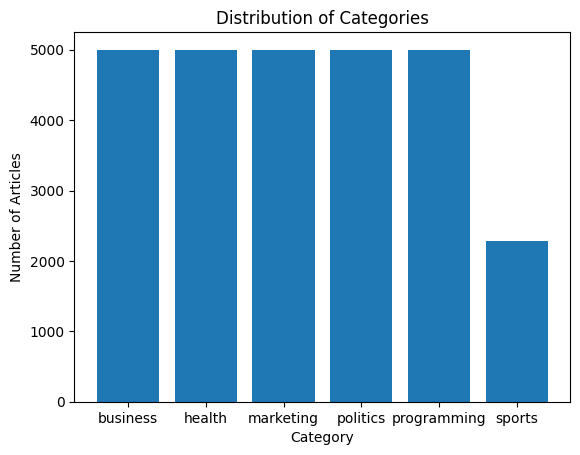

In [2]:
df = pd.read_csv('medium_ML_final_sampled_id.csv')

category_counts = df['category'].value_counts()
plt.bar(category_counts.index, category_counts.values)
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Number of Articles')
plt.show()